In [1]:
f = read.csv("fit_data.csv");

In [2]:
vars = cbind(f$Mod, f$Udl, f$time, f$Pop1, f$Pop10, f$Anime,f$LoreFriendly,f$NotLoreFriendly,f$SexySkimpy,f$Creatures,f$PlantsFoliage,f$AnimationModified,f$AnimationNew,f$EnvironmentOther,f$Facemodels,f$EnvironmentWeather,f$LeveledLists,f$Newmodels,f$Newtextures,f$ScriptedEvents,f$Chargen,f$ENBPreset,f$GameplayEffectsChanges,f$Official,f$PerformanceOptimization,f$Replacer,f$none,f$NotSafeForWork,f$Nudity,f$Unrealistic,f$ArmorShields,f$Clothing,f$ClothingFemale,f$CreaturesRideable,f$LocationsPlayerOwned,f$NPCVendors,f$Weapons,f$Birthsigns,f$Hair,f$Quests,f$Formalecharacters,f$RelatedtoMoviesTVOtherGames,f$FairandBalanced);
colf = c("Mod", "Udl", "time", "Pop1", "Pop10", "Anime","LoreFriendly","NotLoreFriendly","SexySkimpy","Creatures","PlantsFoliage","AnimationModified","AnimationNew","EnvironmentOther","Facemodels","EnvironmentWeather","LeveledLists","Newmodels","Newtextures","ScriptedEvents","Chargen","ENBPreset","GameplayEffectsChanges","Official","PerformanceOptimization","Replacer","none","NotSafeForWork","Nudity","Unrealistic","ArmorShields","Clothing","ClothingFemale","CreaturesRideable","LocationsPlayerOwned","NPCVendors","Weapons","Birthsigns","Hair","Quests","Formalecharacters","RelatedtoMoviesTVOtherGames","FairandBalanced");

dimnames(vars)[[2]] <- colf
data <- data.frame(vars);

dim(vars)

[1] 36769    43

In [3]:

summary(data);


      Mod             Udl               time           Pop1        
 Min.   :    8   Min.   :      0   Min.   : 169   Min.   :0.00000  
 1st Qu.:15072   1st Qu.:    267   1st Qu.: 800   1st Qu.:0.00000  
 Median :29560   Median :    777   Median :1183   Median :0.00000  
 Mean   :31712   Mean   :   8998   Mean   :1103   Mean   :0.01001  
 3rd Qu.:50248   3rd Qu.:   2914   3rd Qu.:1451   3rd Qu.:0.00000  
 Max.   :70665   Max.   :3481538   Max.   :1606   Max.   :1.00000  
     Pop10             Anime          LoreFriendly    NotLoreFriendly  
 Min.   :0.00000   Min.   :0.00000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.0000   Median :0.00000  
 Mean   :0.09998   Mean   :0.01781   Mean   :0.2145   Mean   :0.04874  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.0000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.0000   Max.   :1.00000  
   SexySkimpy       

In [4]:
# Define a function
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max) > level;
  res[sel,sel];
}
hiCor(data,.6)

,Mod,time,Clothing,ClothingFemale
Mod,1.00000000,-0.99987094,0.03415221,0.01793402
time,-0.99987094,1.00000000,-0.03420585,-0.01795345
Clothing,0.03415221,-0.03420585,1.00000000,0.61559451
ClothingFemale,0.01793402,-0.01795345,0.61559451,1.00000000


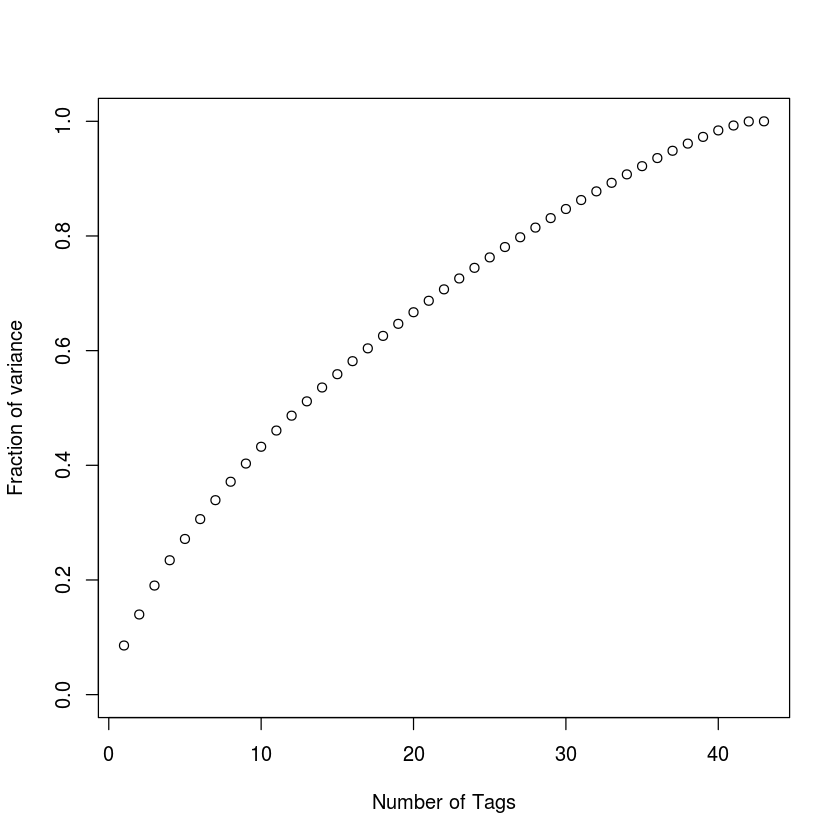

In [3]:
plot(1:43,cumsum(prcomp(vars, retx=F,scale=T)$sdev^2)/sum(prcomp(vars, retx=F,scale=T)$sdev^2),ylim=c(0,1),xlab="Number of Tags",ylab="Fraction of variance");

In [6]:
res<-prcomp(vars, retx=F,scale=T)$rotation[,1:3];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
for (i in 1:3)
  print(t(res[resAbs[,i]>.1,i,drop=FALSE]));

           Mod        Udl       Pop1      Pop10 LoreFriendly NotLoreFriendly
PC1 -0.1000928 -0.2011315 -0.1823131 -0.2019241   -0.2576238      -0.1061891
     Creatures PlantsFoliage AnimationModified AnimationNew EnvironmentOther
PC1 -0.1329244    -0.1479044         -0.129727   -0.1372451       -0.1345016
    Facemodels EnvironmentWeather LeveledLists  Newmodels Newtextures
PC1  -0.110523         -0.1074803   -0.1465364 -0.2269275   -0.217134
    ScriptedEvents GameplayEffectsChanges   Official PerformanceOptimization
PC1      -0.163684             -0.1369114 -0.1096176              -0.1014217
      Replacer      none ArmorShields   Clothing ClothingFemale
PC1 -0.1400566 0.2837841   -0.1821312 -0.2088502     -0.1968377
    CreaturesRideable LocationsPlayerOwned NPCVendors    Weapons Birthsigns
PC1        -0.1110647           -0.1046557 -0.1596723 -0.1727149 -0.1022024
          Hair     Quests Formalecharacters RelatedtoMoviesTVOtherGames
PC1 -0.1096754 -0.1561612        -0.1680953   

In [7]:
modl <- glm(Pop1 ~ time+Anime+LoreFriendly+NotLoreFriendly+SexySkimpy+Creatures+PlantsFoliage+AnimationModified+AnimationNew+EnvironmentOther+Facemodels+EnvironmentWeather+LeveledLists+Newmodels+Newtextures+ScriptedEvents+Chargen+ENBPreset+GameplayEffectsChanges+Official+PerformanceOptimization+Replacer+none+NotSafeForWork+Nudity+Unrealistic+ArmorShields+Clothing+ClothingFemale+CreaturesRideable+LocationsPlayerOwned+NPCVendors+Weapons+Birthsigns+Hair+Quests+Formalecharacters+RelatedtoMoviesTVOtherGames+FairandBalanced,family=binomial,data=data);
summary(modl);


Call:
glm(formula = Pop1 ~ time + Anime + LoreFriendly + NotLoreFriendly + 
    SexySkimpy + Creatures + PlantsFoliage + AnimationModified + 
    AnimationNew + EnvironmentOther + Facemodels + EnvironmentWeather + 
    LeveledLists + Newmodels + Newtextures + ScriptedEvents + 
    Chargen + ENBPreset + GameplayEffectsChanges + Official + 
    PerformanceOptimization + Replacer + none + NotSafeForWork + 
    Nudity + Unrealistic + ArmorShields + Clothing + ClothingFemale + 
    CreaturesRideable + LocationsPlayerOwned + NPCVendors + Weapons + 
    Birthsigns + Hair + Quests + Formalecharacters + RelatedtoMoviesTVOtherGames + 
    FairandBalanced, family = binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3053  -0.1158  -0.0645  -0.0175   4.5095  

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -8.6652169  0.2992657 -28.955  < 2e-16 ***
time                         0.0022416  0.

In [8]:
modl2 <- glm(Pop10 ~ time+Anime+LoreFriendly+NotLoreFriendly+SexySkimpy+Creatures+PlantsFoliage+AnimationModified+AnimationNew+EnvironmentOther+Facemodels+EnvironmentWeather+LeveledLists+Newmodels+Newtextures+ScriptedEvents+Chargen+ENBPreset+GameplayEffectsChanges+Official+PerformanceOptimization+Replacer+none+NotSafeForWork+Nudity+Unrealistic+ArmorShields+Clothing+ClothingFemale+CreaturesRideable+LocationsPlayerOwned+NPCVendors+Weapons+Birthsigns+Hair+Quests+Formalecharacters+RelatedtoMoviesTVOtherGames+FairandBalanced,family=binomial,data=data);
summary(modl2);


Call:
glm(formula = Pop10 ~ time + Anime + LoreFriendly + NotLoreFriendly + 
    SexySkimpy + Creatures + PlantsFoliage + AnimationModified + 
    AnimationNew + EnvironmentOther + Facemodels + EnvironmentWeather + 
    LeveledLists + Newmodels + Newtextures + ScriptedEvents + 
    Chargen + ENBPreset + GameplayEffectsChanges + Official + 
    PerformanceOptimization + Replacer + none + NotSafeForWork + 
    Nudity + Unrealistic + ArmorShields + Clothing + ClothingFemale + 
    CreaturesRideable + LocationsPlayerOwned + NPCVendors + Weapons + 
    Birthsigns + Hair + Quests + Formalecharacters + RelatedtoMoviesTVOtherGames + 
    FairandBalanced, family = binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8102  -0.4595  -0.3188  -0.2491   3.5703  

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -4.031e+00  7.566e-02 -53.281  < 2e-16 ***
time                         1.176e-03  5

In [9]:
anova(modl, test="Chi");

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,36768,4121.09,NA
time,1,109.1436,36767,4011.946,1.509417e-25
Anime,1,10.38839,36766,4001.558,0.001268105
LoreFriendly,1,426.1226,36765,3575.435,1.134497e-94
NotLoreFriendly,1,26.47564,36764,3548.959,2.668827e-07
SexySkimpy,1,11.77339,36763,3537.186,0.0006008347
Creatures,1,12.56777,36762,3524.618,0.0003924573
PlantsFoliage,1,23.76994,36761,3500.848,1.085646e-06
AnimationModified,1,99.55805,36760,3401.29,1.904968e-23
AnimationNew,1,9.203727,36759,3392.086,0.002415229


In [10]:
anova(modl2, test="Chi");

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,36768,23902,NA
time,1,283.2955,36767,23618.7,1.436992e-63
Anime,1,205.9601,36766,23412.74,1.045456e-46
LoreFriendly,1,787.546,36765,22625.19,2.752998e-173
NotLoreFriendly,1,178.7808,36764,22446.41,8.945924e-41
SexySkimpy,1,247.9627,36763,22198.45,7.221021e-56
Creatures,1,20.59647,36762,22177.85,5.670045e-06
PlantsFoliage,1,38.0906,36761,22139.76,6.753485e-10
AnimationModified,1,219.651,36760,21920.11,1.077744e-49
AnimationNew,1,44.85416,36759,21875.26,2.122689e-11


In [11]:
drop1(modl, test="Chi");

,Df,Deviance,AIC,LRT,Pr(>Chi)
,NA,2903.872,2983.872,NA,NA
time,1,3061.45,3139.45,157.5773,3.828323e-36
Anime,1,2905.011,2983.011,1.139182,0.2858253
LoreFriendly,1,3006.856,3084.856,102.9842,3.37828e-24
NotLoreFriendly,1,2907.886,2985.886,4.013775,0.04513001
SexySkimpy,1,2907.787,2985.787,3.914277,0.04787761
Creatures,1,2904.127,2982.127,0.2551615,0.6134639
PlantsFoliage,1,2906.872,2984.872,2.999459,0.08329234
AnimationModified,1,2923.858,3001.858,19.98538,7.803661e-06
AnimationNew,1,2912.005,2990.005,8.132929,0.004346848


In [12]:
drop1(modl2, test="Chi");

,Df,Deviance,AIC,LRT,Pr(>Chi)
,NA,20495.71,20575.71,NA,NA
time,1,20989.19,21067.19,493.4784,2.494357e-109
Anime,1,20553.8,20631.8,58.08161,2.514662e-14
LoreFriendly,1,20667.06,20745.06,171.3449,3.762097e-39
NotLoreFriendly,1,20514.02,20592.02,18.30079,1.886292e-05
SexySkimpy,1,20580.84,20658.84,85.12817,2.79638e-20
Creatures,1,20496.25,20574.25,0.5352933,0.4643899
PlantsFoliage,1,20499.16,20577.16,3.449814,0.06325888
AnimationModified,1,20567.73,20645.73,72.01067,2.140374e-17
AnimationNew,1,20526.98,20604.98,31.2614,2.255191e-08
